In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100

In [24]:
gdp = pd.read_csv('data/gdp_1960_2020.xls')
gdp.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [8]:
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000

In [9]:
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions').tail(9)

,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9966,2020,8,Canada,America,1643407977068,0.021194,1.643408
9965,2020,7,Italy,Europe,1886445268340,0.024328,1.886445
9964,2020,6,France,Europe,2603004395901,0.033569,2.603004
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9962,2020,4,United Kingdom,Europe,2707743777173,0.034920,2.707744
9961,2020,3,Germany,Europe,3806060140124,0.049084,3.806060
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731
9959,2020,1,the United States,America,20936600000000,0.270006,20.936600


/tmp/ipykernel_3704459/1581948783.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_bar['country'],      # Set labels again


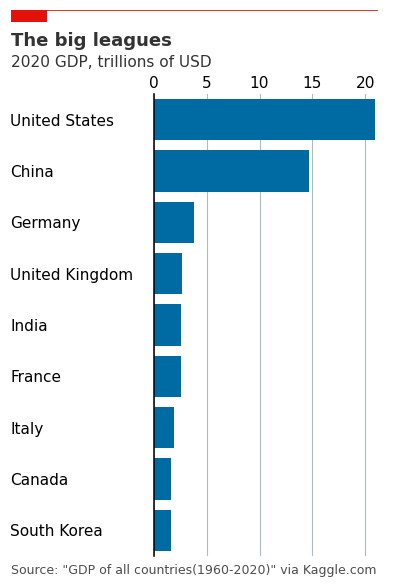

In [12]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)

# Setup data
gdp['country'] = gdp['country'].replace('the United States', 'United States')
gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]

# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="The big leagues", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2020 GDP, trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/economist_bar.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

/tmp/ipykernel_3704459/4085075399.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_bar['country'], ha='left', fontproperties=prop)


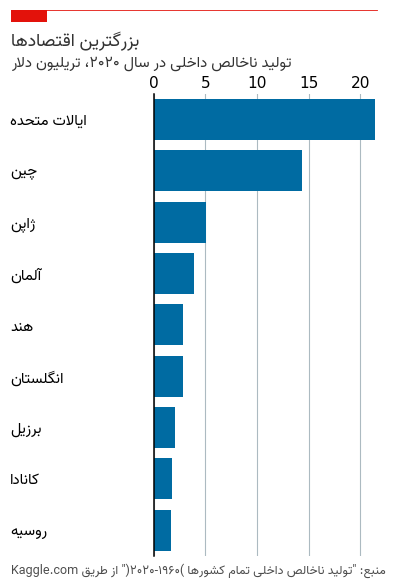

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display
import os

# Create the directory if it doesn't exist
os.makedirs('images', exist_ok=True)

# Ensure you have a Farsi font installed, for example, "Vazir" or "XB Niloofar"
farsi_font_path = '/home/saman/.fonts/Vazir-Regular.ttf'  # Replace with your actual path

# Load the font properties
prop = font_manager.FontProperties(fname=farsi_font_path)

# Sample data
data = {
    'country': ['United States', 'China', 'Germany', 'United Kingdom', 'India', 'Japan', 'Brazil', 'Canada', 'Russia'],
    'gdp_trillions': [21.43, 14.34, 3.86, 2.83, 2.87, 5.08, 2.06, 1.74, 1.64],
    'year': [2020]*9
}
gdp = pd.DataFrame(data)

# Translations
translations = {
    'United States': 'ایالات متحده',
    'China': 'چین',
    'Germany': 'آلمان',
    'United Kingdom': 'انگلستان',
    'India': 'هند',
    'Japan': 'ژاپن',
    'Brazil': 'برزیل',
    'Canada': 'کانادا',
    'Russia': 'روسیه'
}

# Helper function to reshape and display text properly
def reshape_and_display(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Setup data with translations
gdp['country'] = gdp['country'].replace(translations)
gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]

# Reshape Farsi text
gdp_bar['country'] = gdp_bar['country'].apply(reshape_and_display)

# Plot
fig, ax = plt.subplots(figsize=(3, 6))

# Create grid
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines
ax.spines[['top', 'right', 'bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)

# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, bottom=False, labelsize=11, pad=-1)

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'], ha='left', fontproperties=prop)
ax.yaxis.set_tick_params(pad=100, labelsize=11, bottom=False)

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([-.35, .87], [1.02, 1.02], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((-.35, 1.02), 0.12, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth=0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s=reshape_and_display("بزرگترین اقتصادها"), transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, fontproperties=prop)
ax.text(x=-.35, y=.925, s=reshape_and_display("تولید ناخالص داخلی در سال ۲۰۲۰، تریلیون دلار"), transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, fontproperties=prop)

# Set source text
ax.text(x=-.35, y=.08, s=reshape_and_display("""منبع: "تولید ناخالص داخلی تمام کشورها (۱۹۶۰-۲۰۲۰)" از طریق Kaggle.com"""), transform=fig.transFigure, ha='left', fontsize=9, alpha=.7, fontproperties=prop)

# Export plot as high resolution PNG
plt.savefig('images/economist_bar.png', dpi=300, bbox_inches="tight", facecolor='white')
plt.show()


In [ ]:
# read iran heat death data
countries = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]['country'].values

gdp['date'] = pd.to_datetime(gdp['year'], format='%Y')

# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through country names and plot each one.
for country in countries:
    ax.plot(gdp[gdp['country'] == country]['date'], 
            gdp[gdp['country'] == country]['gdp_trillions'], 
            color='#758D99', 
            alpha=0.8, 
            linewidth=3)

# Plot US and China separately
ax.plot(gdp[gdp['country'] == 'United States']['date'], 
        gdp[gdp['country'] == 'United States']['gdp_trillions'], 
        color='#006BA2',
        linewidth=3)

ax.plot(gdp[gdp['country'] == 'China']['date'], 
        gdp[gdp['country'] == 'China']['gdp_trillions'], 
        color='#3EBCD2',
        linewidth=3)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Shrink y-lim to make plot a bit tigheter
ax.set_ylim(0, 23)

# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,25,5),            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline      

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put y-axis labels on top
                         labelbottom=False,  # Set no y-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Add labels for USA and China
ax.text(x=.62, y=.68, s='United States', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.7, y=.4, s='China', transform=fig.transFigure, size=10, alpha=.9)


# Add in line and tag
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="Ahead of the pack", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Top 9 GDP's by country, in trillions of USD, 1960-2020", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/economist_line.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white
